<a href="https://colab.research.google.com/github/AnitaTasnim/image_processing/blob/main/Opencv_For_Face_and_Gesture_Detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
image_path = "/content/Image.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
blur = cv2.GaussianBlur(image, (5, 5), 0)
edge = cv2.Canny(blur, 100, 200)
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)


plt.figure(figsize = (10, 12))


plt.subplot(1, 3, 1)
plt.imshow(image, cmap = "gray")
plt.title("Orginal Image")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(edge, cmap = "gray")
plt.title("Edge Image")
plt.axis("off")


plt.subplot(1, 3, 3)
plt.imshow(contour_image)
plt.title("Contours")
plt.axis("off")


plt.show()

In [ ]:
image_path = "/content/Image.png"
image = cv2.imread(image_path)
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, binary = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)


gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


fig, axs = plt.subplots(2, 2, figsize = (10, 10))



axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Orginal Image")
axs[0, 0].axis("off")


axs[0, 1].imshow(gray, cmap = "gray")
axs[0, 1].set_title("GraY Image")
axs[0, 1].axis("off")


axs[1, 0].imshow(binary, cmap = "gray")
axs[1, 0].set_title("BINARY Image")
axs[1, 0].axis("off")

axs[1, 1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Contour Image")
axs[1, 1].axis("off")


plt.show()

In [ ]:
image_path = "/content/Image.png"
image = cv2.imread(image_path)
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, binary = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)


gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


fig, axs = plt.subplots(2, 2, figsize = (10, 10))



axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Orginal Image")
axs[0, 0].axis("off")


axs[0, 1].imshow(gray, cmap = "gray")
axs[0, 1].set_title("GraY Image")
axs[0, 1].axis("off")


axs[1, 0].imshow(binary, cmap = "gray")
axs[1, 0].set_title("BINARY Image")
axs[1, 0].axis("off")

axs[1, 1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Contour Image")
axs[1, 1].axis("off")


plt.show()

In [ ]:
import os
file_size = os.path.getsize(image_path)
dimensions = image.shape
color_depth = image.dtype

metadata = {"File Size": file_size,
            "Dimension": dimensions,
            "Color":color_depth.itemsize * 8
            }


metadata


In [ ]:
!pip install pydicom

In [ ]:
import pydicom
data = "/content/0.dcm"
image_dicom = pydicom.dcmread(data)
metadata = {de.tag: {"Name":de.name, "Value": de.value} for de in image_dicom.iterall() if hasattr(de, "name")}
metadata

In [ ]:
image_path = "/content/Image.png"
# ORB - Oriented FAST and Rotated BRIEF
# FAST -- Features  from Accelerated Segmented Test
# BRIEF = Binary Robust Independent ELEMENTARY Features

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
datapoints, descriptions = orb.detectAndCompute(image, None)
datapoints_annot = cv2.drawKeypoints(image, datapoints, None, color = (0, 255, 0), flags = 0)

plt.figure(figsize = (10, 10))
plt.imshow(datapoints_annot, cmap = "gray")
plt.title("ORB datapoints for Brain Image")
plt.axis("off")
plt.show()

In [ ]:
k = 3

image_pixel = image.reshape((-1, 3))
image_pixel = np.float32(image_pixel)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.5)
_, labels , (centers)= cv2.kmeans(image_pixel, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)


segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

plt.imshow(segmented_image)
plt.title("Image Segmentation")
plt.axis('off')
#plt.tight_layout()
plt.show()

In [ ]:
k = 3

image_pixel = image.reshape((-1, 3))
image_pixel = np.float32(image_pixel)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.0000000002)
_, labels , (centers)= cv2.kmeans(image_pixel, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)


segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

plt.imshow(segmented_image)
plt.title("Image Segmentation")
plt.axis('off')
#plt.tight_layout()
plt.show()

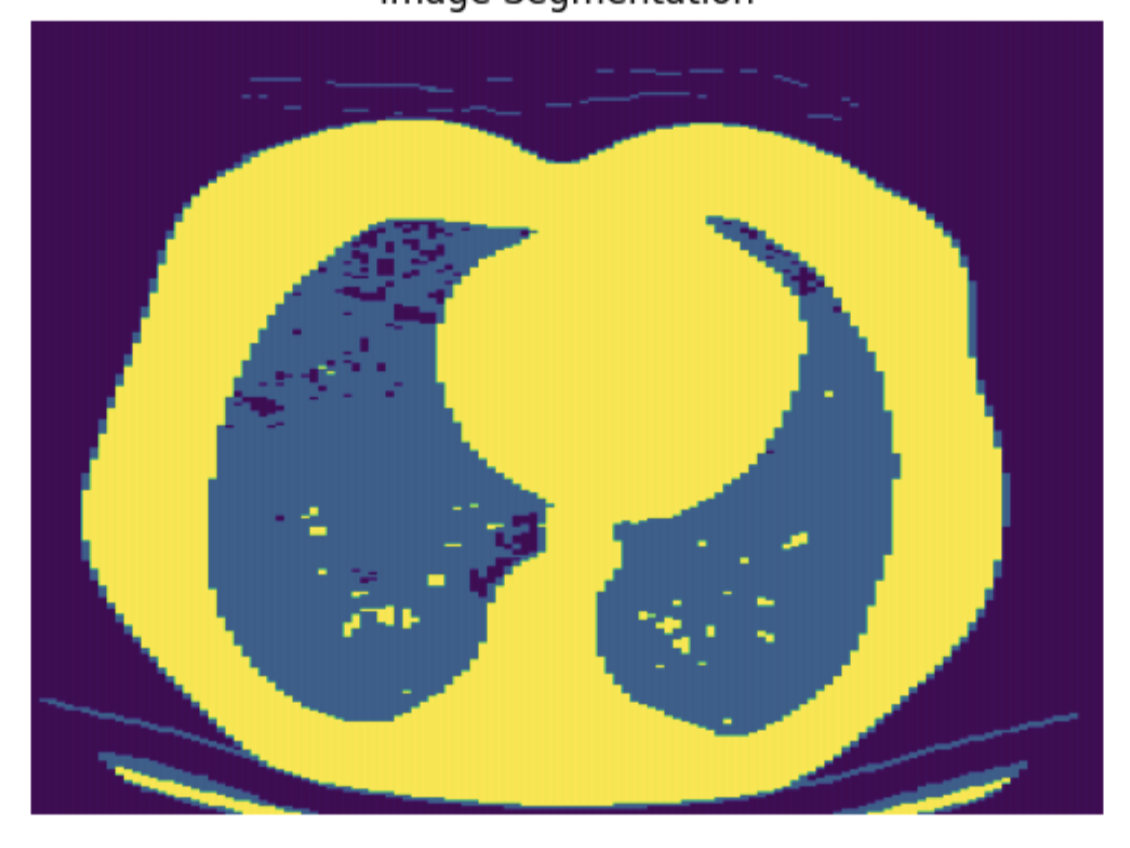